# Loading the Dataset

## Importing pandas so that the csv file can be loaded into a dataframe named df


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('tweets_emotion.csv')
df.head()

,Date,User,Tweet,emotion
0,2023-04-17 15:38:19+00:00,TheDizzle669,@GuitarFamilyMan @brooklyn_jenny @Victorshi202...,anger
1,2023-04-17 15:38:15+00:00,MountainDogMa,@DonaldJTrumpJr Stop lying. There are only adv...,anger
2,2023-04-17 15:38:14+00:00,PopescuCo,Noooo!!! You don't say!!! What a surprise for ...,anger
3,2023-04-17 15:38:12+00:00,darwinesh,@WarMonitors This war reminds me of the war be...,joy
4,2023-04-17 15:38:10+00:00,Orhan583441,"🔥Artillery of the 6th ""Cossack Regiment"" of th...",anger


Removing all rows where the 'Tweet' column has missing values using the dropna() function.

In [3]:
df.dropna(subset=['Tweet'], inplace=True)
df.shape

(15000, 4)

## Maping the emotions to numeric labels

Creating a mapping dictionary called 'mapping' that maps each emotion to a numeric value.


In [4]:
mapping = {
    'anger' : 0,
    'fear' : 1,
    'sadness' : 2,
    'surprise' : 3,
    'joy' : 4,
    'love' : 5,
}

Replacing the emotions in the 'emotion' column of the dataframe df with their corresponding numeric values using the replace() function and store the result in a new column called 'emotion_numeric'.

In [5]:
df['emotion_numeric'] = df['emotion'].replace(mapping)

In [6]:
df.head()

,Date,User,Tweet,emotion,emotion_numeric
0,2023-04-17 15:38:19+00:00,TheDizzle669,@GuitarFamilyMan @brooklyn_jenny @Victorshi202...,anger,0
1,2023-04-17 15:38:15+00:00,MountainDogMa,@DonaldJTrumpJr Stop lying. There are only adv...,anger,0
2,2023-04-17 15:38:14+00:00,PopescuCo,Noooo!!! You don't say!!! What a surprise for ...,anger,0
3,2023-04-17 15:38:12+00:00,darwinesh,@WarMonitors This war reminds me of the war be...,joy,4
4,2023-04-17 15:38:10+00:00,Orhan583441,"🔥Artillery of the 6th ""Cossack Regiment"" of th...",anger,0


# Visualising the Dataset

## Generating a Bar graph to visualize the number of tweets of each emotion


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
emotions_count = df['emotion'].value_counts()

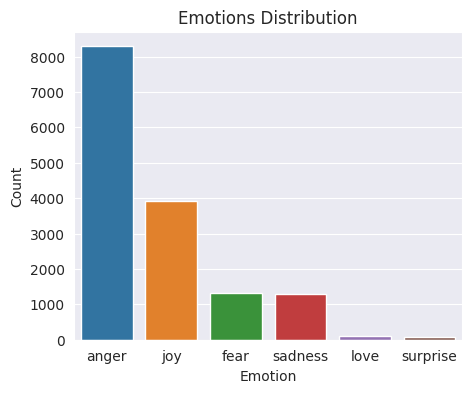

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(5, 4))
sns.barplot(x=emotions_count.index, y=emotions_count.values)
plt.title('Emotions Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

## Generating a word cloud to get an idea of most used words

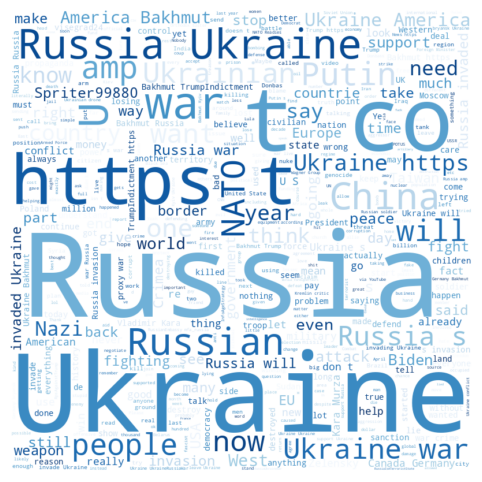

In [10]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=500, colormap='Blues').generate(' '.join(df['Tweet']))
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Tweet Preprocessing

## Cleaning the Tweets

### Defining a function called clean_tweet() that takes a text string as input and removes Twitter-specific characters such as @mentions, RT, hashtags, and URLs using regular expressions

In [11]:
import re

def clean_tweet(text):
    if not isinstance(text, str):
        return ''
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'(RT[\s]+|:[\s]+)', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    return text


Applying this function to the 'Tweet' column of the dataframe df using the apply() function

In [12]:
df['Tweet'] = df['Tweet'].apply(lambda twt: clean_tweet(twt))

In [13]:
df.head()

,Date,User,Tweet,emotion,emotion_numeric
0,2023-04-17 15:38:19+00:00,TheDizzle669,_jenny Its literally one of the smallest rif...,anger,0
1,2023-04-17 15:38:15+00:00,MountainDogMa,Stop lying. There are only advisors on the gr...,anger,0
2,2023-04-17 15:38:14+00:00,PopescuCo,Noooo!!! You don't say!!! What a surprise for ...,anger,0
3,2023-04-17 15:38:12+00:00,darwinesh,This war reminds me of the war between China ...,joy,4
4,2023-04-17 15:38:10+00:00,Orhan583441,"🔥Artillery of the 6th ""Cossack Regiment"" of th...",anger,0


## Removing emojis from the tweets

### Defining a function called deEmojify() that takes a text string as input and removes any emojis using regular expressions. 

In [14]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

Applying this function to the 'Tweet' column of the dataframe df using the apply() function.


In [15]:
df['Tweet'] = df['Tweet'].apply(lambda twt: deEmojify(twt))

In [16]:
df.head()

,Date,User,Tweet,emotion,emotion_numeric
0,2023-04-17 15:38:19+00:00,TheDizzle669,_jenny Its literally one of the smallest rif...,anger,0
1,2023-04-17 15:38:15+00:00,MountainDogMa,Stop lying. There are only advisors on the gr...,anger,0
2,2023-04-17 15:38:14+00:00,PopescuCo,Noooo!!! You don't say!!! What a surprise for ...,anger,0
3,2023-04-17 15:38:12+00:00,darwinesh,This war reminds me of the war between China ...,joy,4
4,2023-04-17 15:38:10+00:00,Orhan583441,"Artillery of the 6th ""Cossack Regiment"" of the...",anger,0


## Importing and Downloading necessary NLTK resources

In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from textblob import TextBlob

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Generating english stop words and storing them into the list names enlish_stopwords. Ignoring stopwords like not, cannot, etc as they would help in emotion classification

In [18]:
stemmer = SnowballStemmer(language = 'english')
english_stopwords = stopwords.words('english')
english_stopwords = english_stopwords[:116]
','.join(english_stopwords)

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such"

## Function to convert chat acronyms to full form

### Generating a chat word dictionary with full form of common chat acronyms. Then creating a function chat_conversation() which would replace the acronyms in a phrase if found.

In [19]:
chat_words = {
    "lol": "laugh out loud",
    "brb": "be right back",
    "omg": "oh my god",
    "jk": "just kidding",
    "fyi": "for your information",
    "btw": "by the way",
    "afaik": "as far as I know",
    "idk": "I don't know",
    "imo": "in my opinion",
    "tbh": "to be honest",
    "ty": "thank you",
    "yw": "you're welcome",
    "np": "no problem",
    "gg": "good game",
    "wp": "well played",
    "ggwp": "good game, well played",
    "irl": "in real life",
    "imo": "in my opinion",
    "smh": "shaking my head",
    "tfw": "that feeling when",
    "thx": "thanks",
    "wtf": "what the f***",
    "omw": "on my way",
    "jk": "just kidding",
    "rn": "right now",
    "afk": "away from keyboard",
    "b4": "before",
    "cu": "see you",
    "dbmib": "don't bother me I'm busy",
    "dl": "download",
    "dw": "don't worry",
    "ez": "easy",
    "ffs": "for f***'s sake",
    "fu": "f*** you",
    "hbu": "how about you",
    "hru": "how are you",
    "ic": "I see",
    "idc": "I don't care",
    "ikr": "I know, right",
    "ily": "I love you",
    "imho": "in my humble opinion",
    "lmao": "laughing my ass off",
    "lmk": "let me know",
    "nbd": "no big deal",
    "nvm": "nevermind",
    "ofc": "of course",
    "ppl": "people",
    "rofl": "rolling on the floor laughing",
    "srsly": "seriously",
    "stfu": "shut the f*** up",
    "tmi": "too much information",
    "ttyl": "talk to you later",
    "u": "you",
    "ur": "your",
    "wbu": "what about you",
    "wth": "what the hell",
    "yolo": "you only live once",
    "yw": "you're welcome",
    "amp": "and"
}

def chat_conversation(text):
  new_text = []
  for word in text.split():
    if word.lower() in chat_words:
      new_text.append(chat_words[word.lower()])
    else:
      new_text.append(word)
  return " ".join(new_text)

# Tokenization function

## Defining a function called tokenize() that takes a text string as input, converts it to lowercase, removes non-alphabetic characters, removes stop words, corrects incorrect spellings and applies stemming using the SnowballStemmer algorithm from the NLTK package.

In [22]:
def tokenize(txt):
    txt = chat_conversation(txt.lower())
    # textBlb = TextBlob(txt)
    # text = textBlb.correct().string
    return [stemmer.stem(token) for token in word_tokenize(txt) if token.isalpha() and token not in english_stopwords]

In [23]:
# Testing the tokenize function
tokenize('What a wonderful lifee !!')

['wonder', 'life']

# Initializing the TFIDF Vector


## Creating the Tfidf Vector using TfidfVectorizer function from sklearn. The tokenize() function we created is passed in the tokenizer, ngram range is set to a maximum value of 2 and the maximum of 2000 features can be generated 

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
vectorizer = TfidfVectorizer(
    tokenizer = tokenize,
    ngram_range = (1,2),
    max_features = 2000,
)

# Spliting the dataset into Test and Train

## Splitting the database into 2 parts: 80% data will be Training data (df1) and the rest would be Test Data (df2) with a randomness factor of 42. 

In [40]:
from sklearn.model_selection import train_test_split

df1, df2 = train_test_split(df, test_size=0.2, random_state=42)

## Transforming the Tweet column of both the dataframes seperately


In [41]:
train_inputs = vectorizer.fit_transform(df1.Tweet)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [42]:
val_inputs = vectorizer.transform(df2.Tweet)

## Creating the resultant value lists of train and test data


In [44]:
train_targets = df1.emotion_numeric
val_targets = df2.emotion_numeric

# Applying Support Vector Machine Algorithm

## Using SVM(SVC) from sklearn with rbf kernel, C=10 and gamma=1

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = SVC(kernel='rbf', C=10, gamma=1)

clf.fit(train_inputs, train_targets)

train_pred = clf.predict(train_inputs)
accuracy_train = accuracy_score(train_targets, train_pred)

val_pred = clf.predict(val_inputs)
accuracy_val = accuracy_score(val_targets, val_pred)

print('Accuracy on Train Set:', accuracy_train)
print('Accuracy on Test Set:', accuracy_val)

Accuracy on Train Set: 0.9939166666666667
Accuracy on Test Set: 0.6876666666666666


## Generating report on Precision, Recall and F1 score

In [32]:
report = classification_report(val_targets, val_pred, zero_division=1)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.86      0.77      1665
           1       0.72      0.49      0.58       268
           2       0.59      0.33      0.42       246
           3       0.50      0.08      0.14        12
           4       0.63      0.52      0.57       787
           5       1.00      0.05      0.09        22

    accuracy                           0.68      3000
   macro avg       0.69      0.39      0.43      3000
weighted avg       0.68      0.68      0.67      3000



Generating Confusion Matrix

<Axes: >

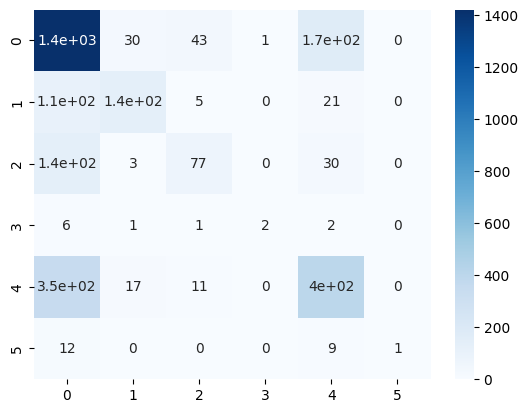

In [ ]:
cm = confusion_matrix(val_targets, val_pred)
sns.heatmap(cm, annot=True, cmap='Blues')